# Challenge: Analyzing Text about Data Science

In this example, let's do a simple exercise that covers all steps of a traditional data science process. You do not have to write any code, you can just click on the cells below to execute them and observe the result. As a challenge, you are encouraged to try this code out with different data.

## Goal

In this lesson, we have been discussing different concepts related to Data Science. Let's try to discover more related concepts by doing some **text mining**. We will start with a text about Data Science, extract keywords from it, and then try to visualize the result.

As a text, I will use the page on Data Science from Wikipedia:

In [19]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## Step 1: Getting the Data

First step in every data science process is getting the data. We will use `requests` library to do that:

In [2]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Data science - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feat

## Step 2: Transforming the Data

The next step is to convert the data into the form suitable for processing. In our case, we have downloaded HTML source code from the page, and we need to convert it into plain text.

There are many ways this can be done. We will use the simplest built-in [HTMLParser](https://docs.python.org/3/library/html.parser.html) object from Python. We need to subclass the `HTMLParser` class and define the code that will collect all text inside HTML tags, except `<script>` and `<style>` tags.

In [3]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Search Search Donate Appearance Create account Log in Personal tools Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 Foundations Toggle Foundations subsection 1.1 Relationship to statistics 2 Etymology Toggle Etymology subsection 2.1 Early usage 2.2 Modern usage 3 Data science and data analysis 4 Cloud computing for data science 5 Ethical consideration in data science 6 See also 7 References Toggle the table of contents Data science 47 languages العربية Azərbaycanca বাংলা Български Català Čeština Deutsch Eesti Ελληνικά Español Esperanto Euskara فارسی Français Galego 한국어 Հայերեն हिन्दी Bahasa Indonesia IsiZulu Italiano עברית ಕನ್ನಡ Қазақша Latviešu Македонски Bahas

## Step 3: Getting Insights

The most important step is to turn our data into some form from which we can draw insights. In our case, we want to extract keywords from the text, and see which keywords are more meaningful.

We will use Python library called [RAKE](https://github.com/aneesha/RAKE) for keyword extraction. First, let's install this library in case it is not present:

In [4]:
import sys
!{sys.executable} -m pip install nlp_rake

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 8.0 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=41d739ee5e6a65946cb58304494a286897129ab824f206e0949c4cb9763d6ec8
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


The main functionality is available from `Rake` object, which we can customize using some parameters. In our case, we will set the minimum length of a keyword to 5 characters, minimum frequency of a keyword in the document to 3, and maximum number of words in a keyword - to 2. Feel free to play around with other values and observe the result.

In [13]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data scientist', 4.0),
 ('data visualization', 4.0),
 ('machine learning', 4.0),
 ('data mining', 4.0),
 ('sexiest job', 4.0),
 ('21st century', 4.0),
 ('big data', 4.0),
 ('data scientists', 4.0),
 ('data science', 3.901408450704225),
 ('computer science', 3.901408450704225),
 ('statistical learning', 3.9),
 ('information science', 3.8244853737811484),
 ('^ davenport', 3.8),
 ('cloud computing', 3.75),
 ('data analysis', 3.7058823529411766),
 ('extract insights', 3.5277777777777777),
 ('science', 1.9014084507042253),
 ('analysis', 1.7058823529411764),
 ('field', 1.4285714285714286),
 ('computational', 1.4),
 ('processing', 1.25),
 ('process', 1.25),
 ('statistics', 1.2173913043478262),
 ('thomas', 1.2),
 ('mathematics', 1.0),
 ('education', 1.0),
 ('communications', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]


We obtained a list terms together with associated degree of importance. As you can see, the most relevant disciplines, such as machine learning and big data, are present in the list at top positions.

## Step 4: Visualizing the Result

People can interpret the data best in the visual form. Thus it often makes sense to visualize the data in order to draw some insights. We can use `matplotlib` library in Python to plot simple distribution of the keywords with their relevance:

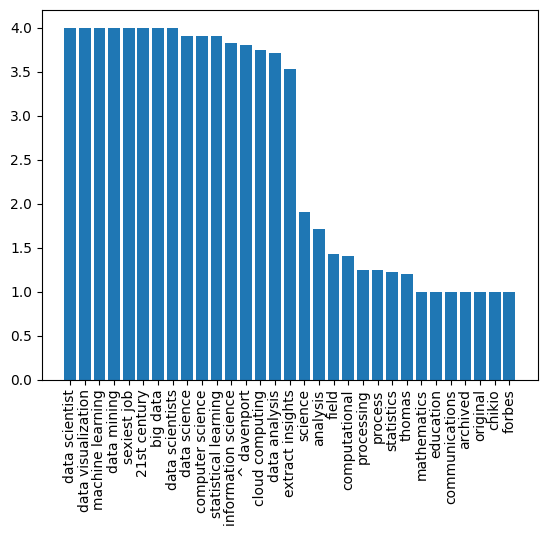

In [14]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

There is, however, even better way to visualize word frequencies - using **Word Cloud**. We will need to install another library to plot the word cloud from our keyword list.

In [15]:
!{sys.executable} -m pip install wordcloud

`WordCloud` object is responsible for taking in either original text, or pre-computed list of words with their frequencies, and returns and image, which can then be displayed using `matplotlib`:

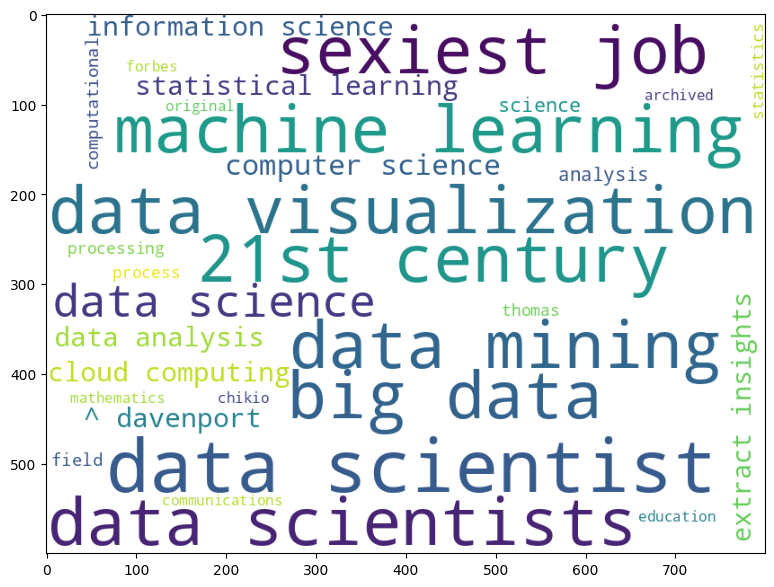

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

We can also pass in the original text to `WordCloud` - let's see if we are able to get similar result:

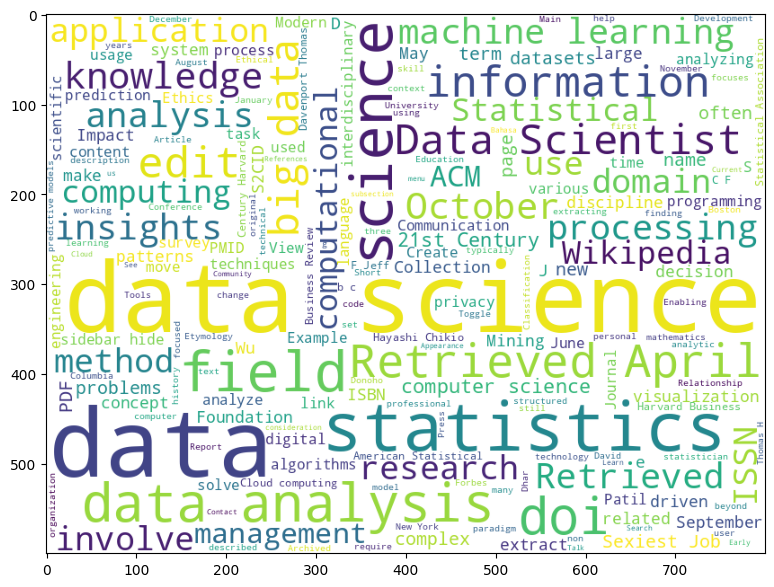

In [17]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [ ]:
wc.generate(text).to_file('images/ds_wordcloud.png')

You can see that word cloud now looks more impressive, but it also contains a lot of noise (eg. unrelated words such as `Retrieved on`). Also, we get fewer keywords that consist of two words, such as *data scientist*, or *computer science*. This is because RAKE algorithm does much better job at selecting good keywords from text. This example illustrates the importance of data pre-processing and cleaning, because clear picture at the end will allow us to make better decisions.

In this exercise we have gone through a simple process of extracting some meaning from Wikipedia text, in the form of keywords and word cloud. This example is quite simple, but it demonstrates well all typical steps a data scientist will take when working with data, starting from data acquisition, up to visualization.

In our course we will discuss all those steps in detail.

# Assigment solution: Word count for big data and machine learning

In [20]:
big_data_url = 'https://en.wikipedia.org/wiki/Big_data'
machine_learning_url = 'https://en.wikipedia.org/wiki/Machine_learning'

In [21]:
import requests
bigtext = requests.get(big_data_url).content.decode('utf-8')
machinetext = requests.get(machine_learning_url).content.decode('utf-8')

In [22]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(bigtext)
bigtext = parser.res
print(bigtext[:1000])
machinetext = parser.res

 Big data - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Search Search Donate Appearance Create account Log in Personal tools Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 Definition Toggle Definition subsection 1.1 Big data vs. business intelligence 2 Characteristics 3 Architecture 4 Technologies 5 Applications Toggle Applications subsection 5.1 Government 5.2 International development 5.2.1 Benefits 5.2.2 Challenges 5.3 Finance 5.4 Healthcare 5.5 Education 5.6 Media 5.7 Insurance 5.8 Internet of things (IoT) 5.9 Information technology 5.10 Survey science 5.11 Marketing 6 Case studies Toggle Case studies subsection 6.1 Government 6.1.1 China 6.1.2 India 6.1.3 Israel 6.1.4 United Kingdom 6.1.5 United States 6.2 Retail 6.

In [23]:
import sys
!{sys.executable} -m pip install nlp_rake

In [35]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=6,min_chars=3)
bigres = extractor.apply(bigtext)
bigres

[('machine learning', 4.0),
 ('wayback machine', 4.0),
 ('big data', 3.8235294117647056),
 ('data collected', 3.592760180995475),
 ('international journal', 3.416666666666667),
 ('data', 1.8235294117647058),
 ('research', 1.7692307692307692),
 ('information', 1.6511627906976745),
 ('science', 1.5555555555555556),
 ('challenges', 1.5294117647058822),
 ('analysis', 1.4761904761904763),
 ('marketing', 1.4705882352941178),
 ('technologies', 1.4615384615384615),
 ('healthcare', 1.4545454545454546),
 ('characteristics', 1.4545454545454546),
 ('google', 1.4545454545454546),
 ('government', 1.4285714285714286),
 ('development', 1.4210526315789473),
 ('privacy', 1.4166666666666667),
 ('journal', 1.4166666666666667),
 ('needed', 1.4),
 ('future', 1.4),
 ('internet', 1.35),
 ('society', 1.2727272727272727),
 ('based', 1.25),
 ('field', 1.25),
 ('past', 1.25),
 ('hilbert', 1.2222222222222223),
 ('day', 1.2222222222222223),
 ('nature', 1.2),
 ('size', 1.1666666666666667),
 ('volume', 1.153846153846

In [36]:
extractor2 = nlp_rake.Rake(max_words=2,min_freq=5,min_chars=5)
machineres = extractor2.apply(machinetext)
machineres

[('big data', 4.0),
 ('machine learning', 4.0),
 ('latin america', 4.0),
 ('wayback machine', 4.0),
 ('data collected', 3.769230769230769),
 ('business intelligence', 3.7666666666666666),
 ('york times', 3.642857142857143),
 ('international journal', 3.416666666666667),
 ('research', 1.7692307692307692),
 ('information', 1.6511627906976745),
 ('processing', 1.5833333333333333),
 ('media', 1.5833333333333333),
 ('science', 1.5555555555555556),
 ('challenges', 1.5294117647058822),
 ('analysis', 1.4761904761904763),
 ('marketing', 1.4705882352941178),
 ('technologies', 1.4615384615384615),
 ('healthcare', 1.4545454545454546),
 ('characteristics', 1.4545454545454546),
 ('google', 1.4545454545454546),
 ('government', 1.4285714285714286),
 ('development', 1.4210526315789473),
 ('privacy', 1.4166666666666667),
 ('journal', 1.4166666666666667),
 ('needed', 1.4),
 ('future', 1.4),
 ('things', 1.375),
 ('number', 1.375),
 ('internet', 1.35),
 ('difficult', 1.2857142857142858),
 ('23andme', 1.285

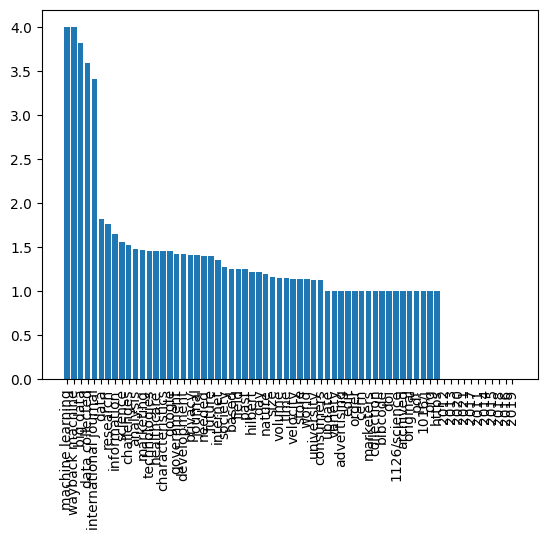

In [37]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(bigres)

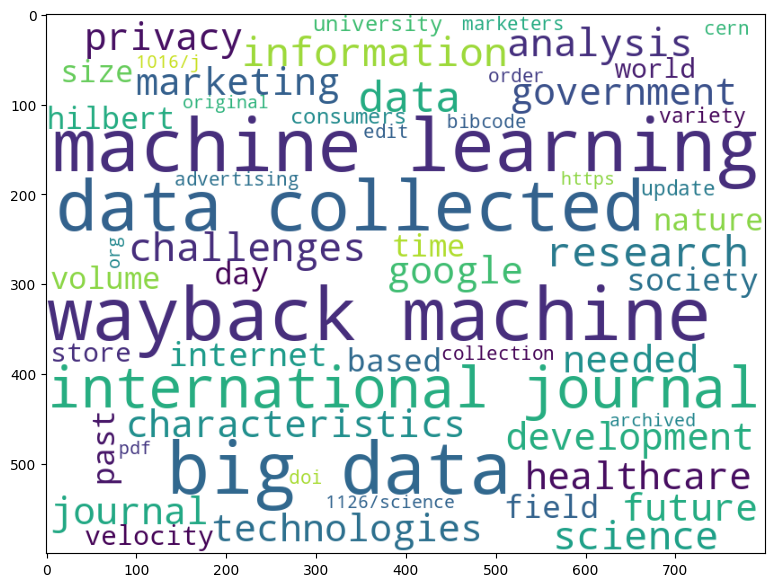

In [38]:
!{sys.executable} -m pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in bigres }))

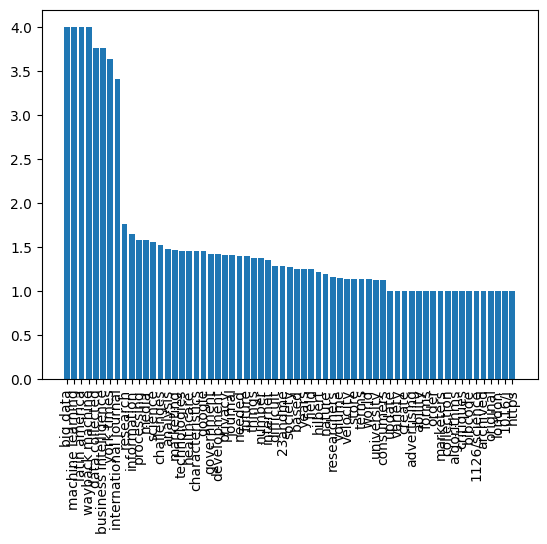

In [39]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(machineres)

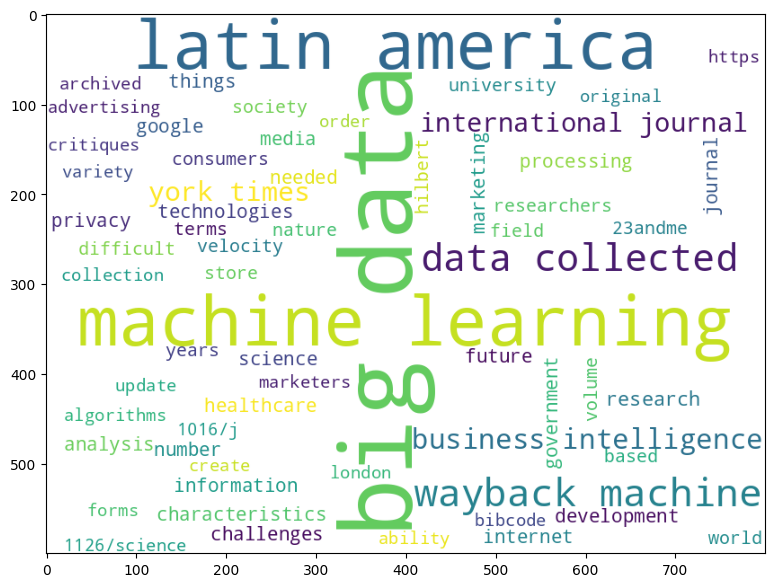

In [40]:
!{sys.executable} -m pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in machineres }))